In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from statistics import mode
from sklearn.metrics import accuracy_score

In [2]:
data = fetch_openml('mnist_784', version=1, as_frame=False)
(n_samples, n_features), n_digits = data.data.shape, np.unique(data.target).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 70000; # features 784


In [3]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

train_img = scaler.fit_transform(X_train)
test_img = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [5]:
kmeans = KMeans(n_clusters=n_digits, random_state=42)
kmeans.fit(X_train_pca)
train_clusters = kmeans.predict(X_train_pca)
labels = kmeans.labels_

In [6]:
incorrect_indices = []
for cluster in range(n_digits):
    cluster_indices = np.where(train_clusters == cluster)[0]
    true_labels = y_train[labels == cluster].astype(int)
    incorrect_indices.extend(
        cluster_indices[true_labels != np.argmax(np.bincount(true_labels))])

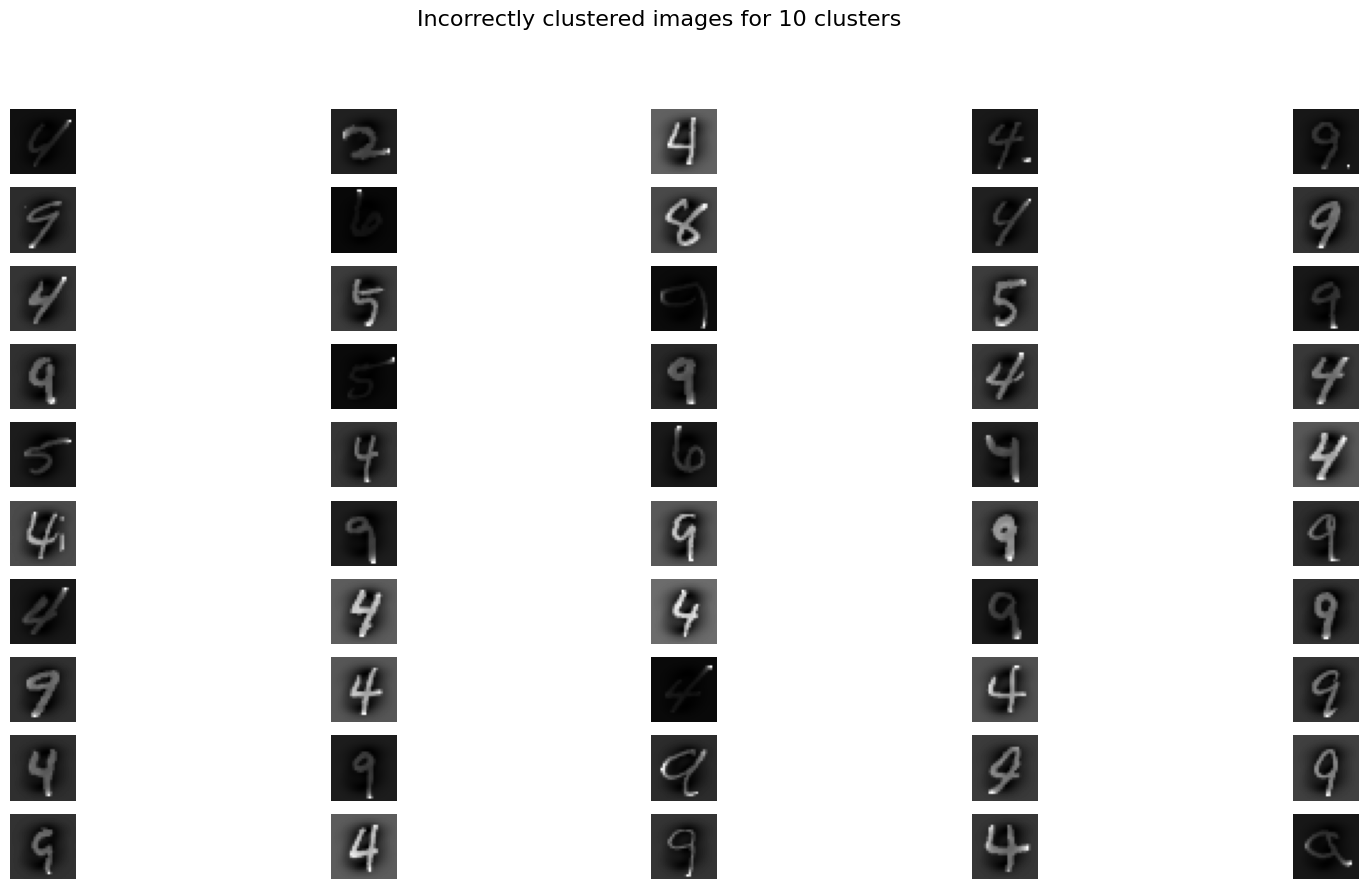

In [7]:
# Plot error predictions
plt.figure(figsize=(20, 10))
for i, idx in enumerate(incorrect_indices[:5 * 10]):
    plt.subplot(10, 5, i + 1)
    plt.imshow(train_img[idx].reshape(28, 28), cmap='gray')
    # plt.title(f'Cluster {train_clusters[idx]}')
    plt.axis('off')
plt.suptitle(f'Incorrectly clustered images for {
    10} clusters', fontsize=16)
plt.show()

Train Accuracy for k-means++ with 2 clusters: 0.20467857142857143
Test Accuracy for k-means++ with 2 clusters: 0.21035714285714285


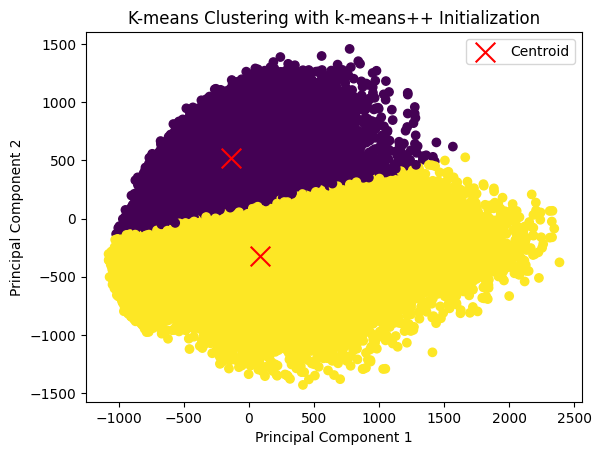

Train Accuracy for random with 2 clusters: 0.2075
Test Accuracy for random with 2 clusters: 0.20664285714285716


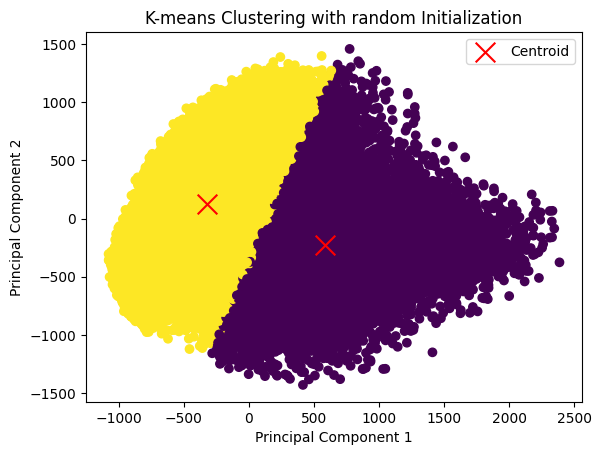

Train Accuracy for k-means++ with 3 clusters: 0.29573214285714283
Test Accuracy for k-means++ with 3 clusters: 0.29914285714285715


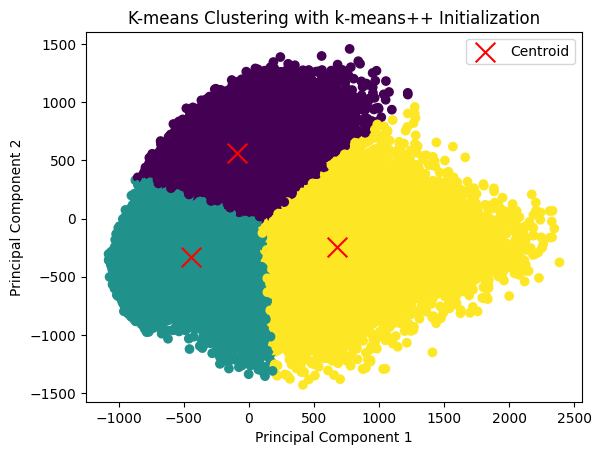

Train Accuracy for random with 3 clusters: 0.29573214285714283
Test Accuracy for random with 3 clusters: 0.2992142857142857


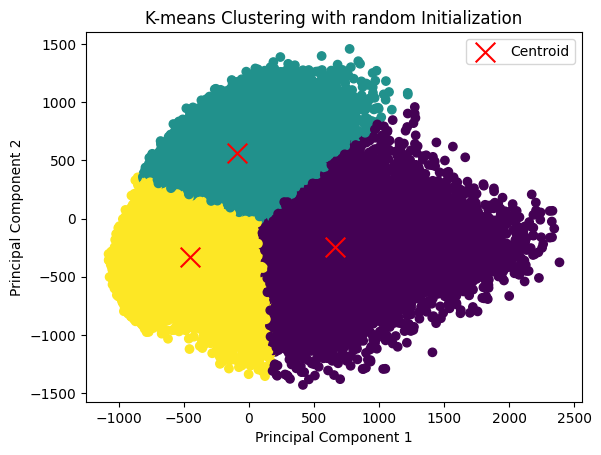

Train Accuracy for k-means++ with 4 clusters: 0.35435714285714287
Test Accuracy for k-means++ with 4 clusters: 0.3462857142857143


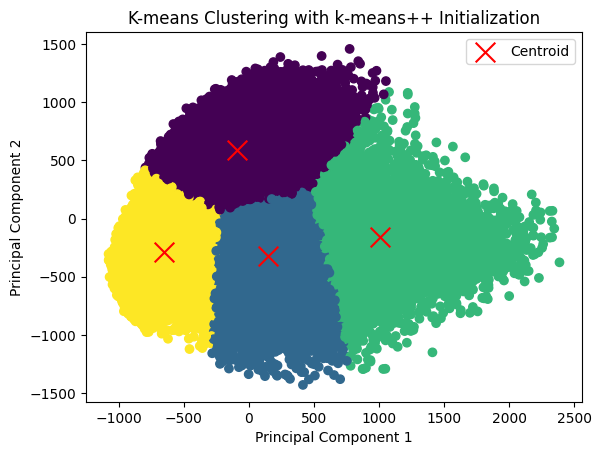

Train Accuracy for random with 4 clusters: 0.3553392857142857
Test Accuracy for random with 4 clusters: 0.3465


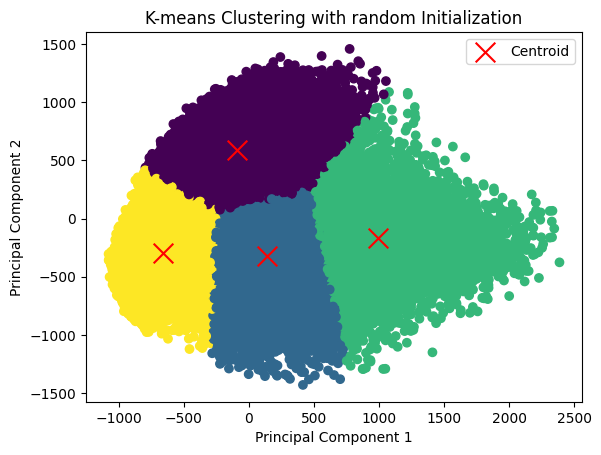

Train Accuracy for k-means++ with 5 clusters: 0.37323214285714285
Test Accuracy for k-means++ with 5 clusters: 0.3705


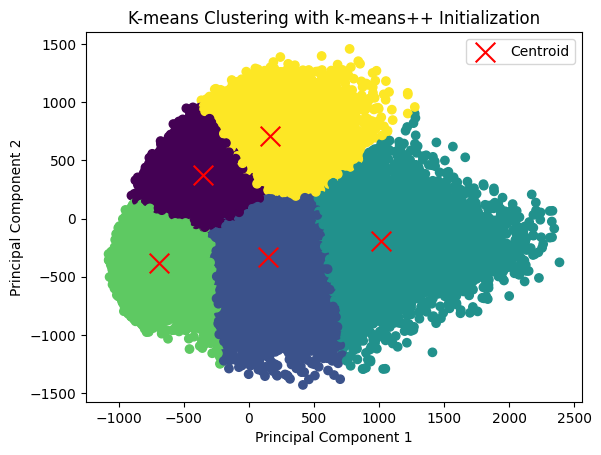

Train Accuracy for random with 5 clusters: 0.3716964285714286
Test Accuracy for random with 5 clusters: 0.3693571428571429


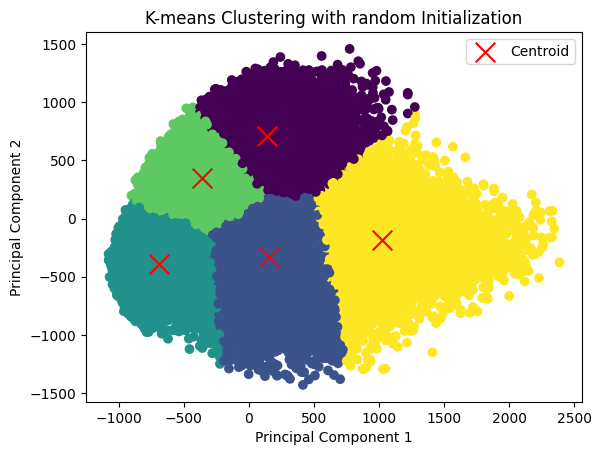

Train Accuracy for k-means++ with 6 clusters: 0.39703571428571427
Test Accuracy for k-means++ with 6 clusters: 0.3939285714285714


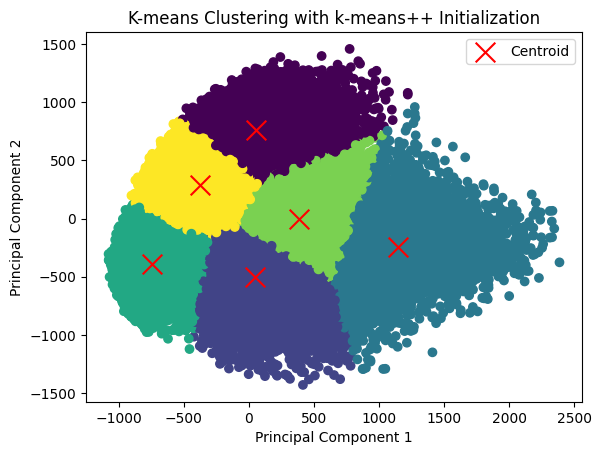

Train Accuracy for random with 6 clusters: 0.3986607142857143
Test Accuracy for random with 6 clusters: 0.39614285714285713


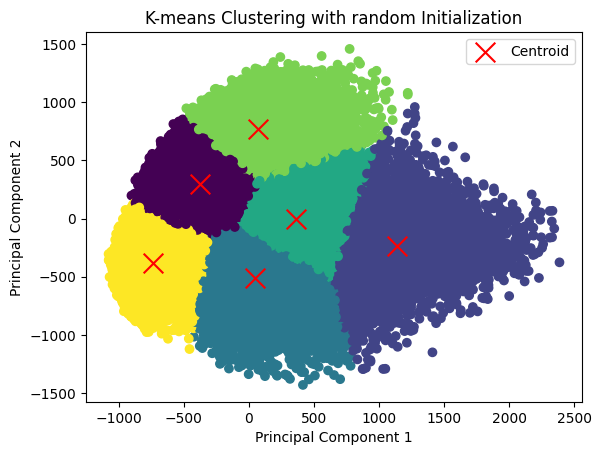

Train Accuracy for k-means++ with 7 clusters: 0.4198928571428571
Test Accuracy for k-means++ with 7 clusters: 0.41814285714285715


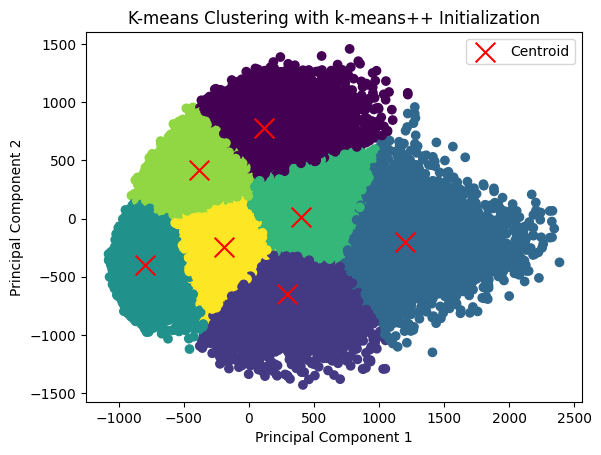

Train Accuracy for random with 7 clusters: 0.42046428571428573
Test Accuracy for random with 7 clusters: 0.4182142857142857


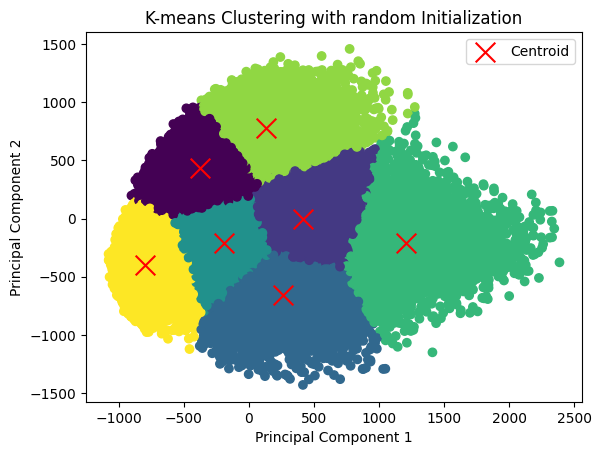

Train Accuracy for k-means++ with 8 clusters: 0.40482142857142855
Test Accuracy for k-means++ with 8 clusters: 0.4075714285714286


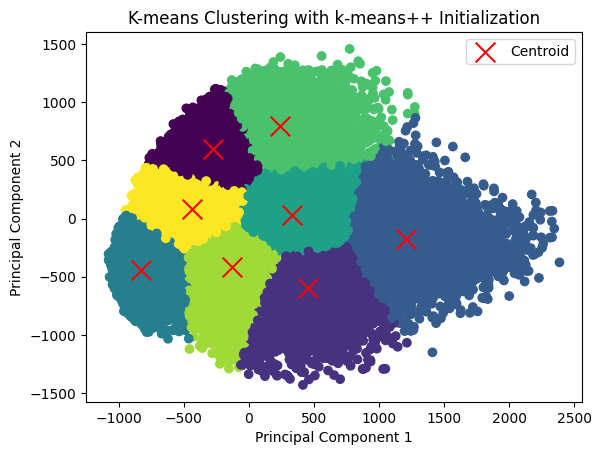

Train Accuracy for random with 8 clusters: 0.42244642857142856
Test Accuracy for random with 8 clusters: 0.422


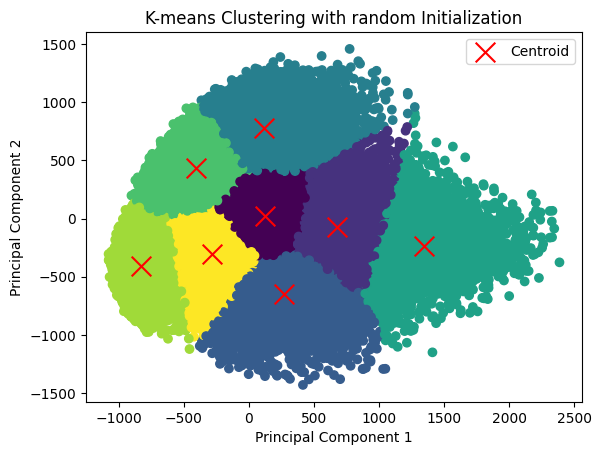

Train Accuracy for k-means++ with 9 clusters: 0.4178392857142857
Test Accuracy for k-means++ with 9 clusters: 0.41728571428571426


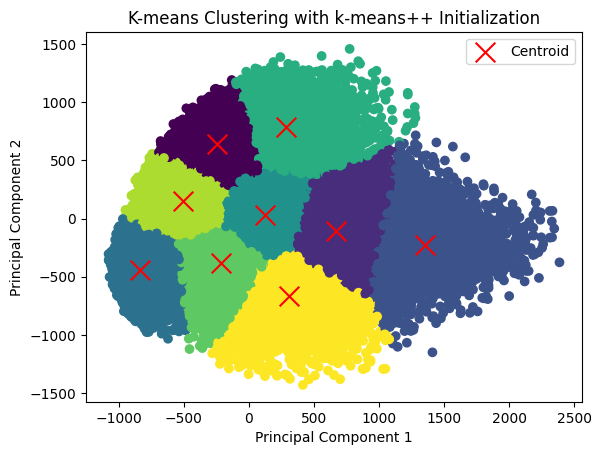

Train Accuracy for random with 9 clusters: 0.4196964285714286
Test Accuracy for random with 9 clusters: 0.4193571428571429


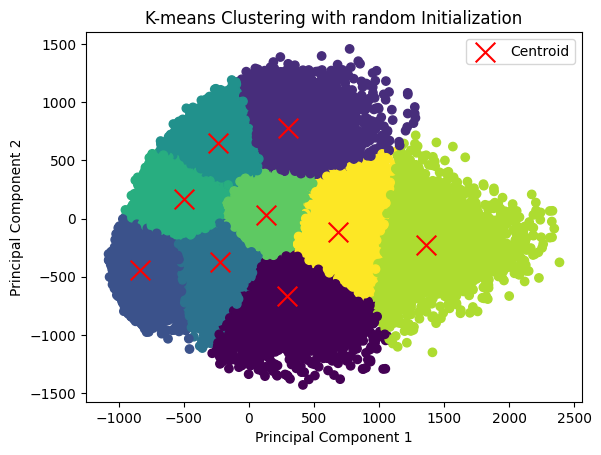

Train Accuracy for k-means++ with 10 clusters: 0.4065714285714286
Test Accuracy for k-means++ with 10 clusters: 0.4067857142857143


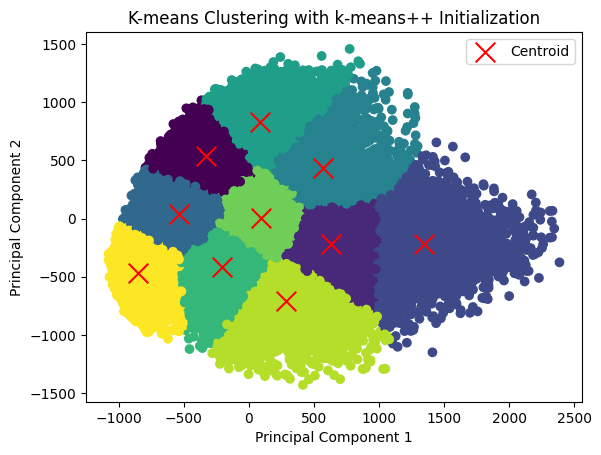

Train Accuracy for random with 10 clusters: 0.4020892857142857
Test Accuracy for random with 10 clusters: 0.40735714285714286


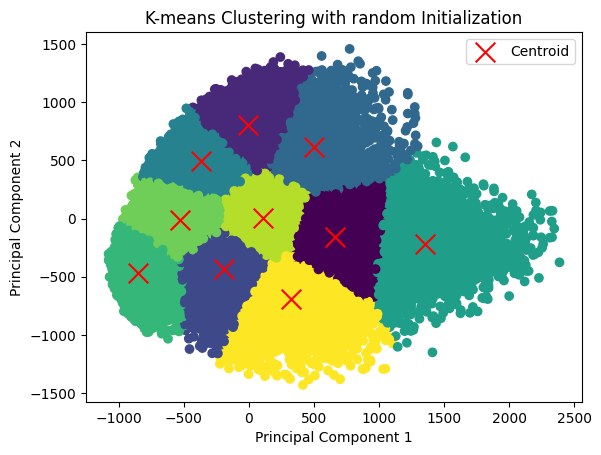

In [8]:
init_methods = ['k-means++', 'random']
for n_clusters in range(2, n_digits+1):
    for method in init_methods:
        kmeans = KMeans(n_clusters=n_clusters, init=method, random_state=42)
        kmeans.fit(X_train_pca)
        labels = kmeans.labels_
        train_cluster_labels = kmeans.labels_
        test_cluster_labels = kmeans.predict(pca.transform(X_test))

        cluster_labels_map = {}
        for cluster in range(n_clusters):
            true_label = mode(y_train[train_cluster_labels == cluster])[0][0]
            cluster_labels_map[cluster] = true_label

        train_pred_labels = [cluster_labels_map[label]
                             for label in train_cluster_labels]
        test_pred_labels = [cluster_labels_map[label]
                            for label in test_cluster_labels]

        train_accuracy = accuracy_score(y_train, train_pred_labels)
        test_accuracy = accuracy_score(y_test, test_pred_labels)

        print(f"Train Accuracy for {method} with {
              n_clusters} clusters: {train_accuracy}")
        print(f"Test Accuracy for {method} with {
              n_clusters} clusters: {test_accuracy}")

        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                    c=labels, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[




                    :, 1], marker='x', c='red', s=200, label='Centroid')
        plt.title(f'K-means Clustering with {method} Initialization')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.show()

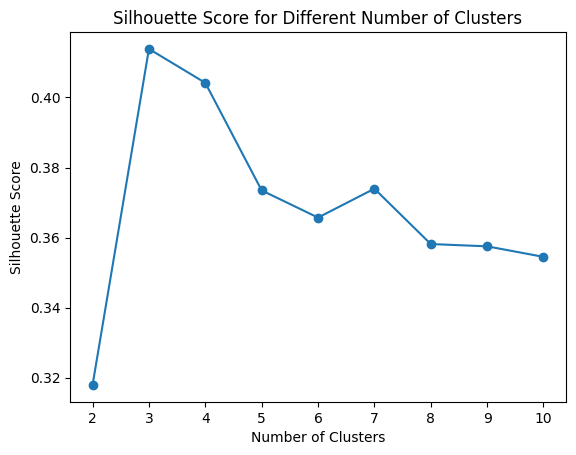

In [9]:
silhouette_scores = []
for n_clusters in range(2, n_digits+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

plt.plot(range(2, n_digits+1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
silhouette_scores = []
for n_clusters in range(2, n_digits+1):
    kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    kmeans.fit(X_train_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

plt.plot(range(2, n_digits+1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=n_digits, random_state=42)
kmeans.fit(X_train_pca)
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(pca.transform(X_test))

cluster_labels_map = {}
for cluster in range(n_digits):
    true_label = mode(y_train[train_cluster_labels == cluster])[0][0]
    cluster_labels_map[cluster] = true_label


train_pred_labels = [cluster_labels_map[label]
                     for label in train_cluster_labels]
test_pred_labels = [cluster_labels_map[label] for label in test_cluster_labels]

train_accuracy = accuracy_score(y_train, train_pred_labels)
test_accuracy = accuracy_score(y_test, test_pred_labels)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.4065714285714286
Test Accuracy: 0.4067857142857143
